In [129]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

import pickle 
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
sns.set_style("darkgrid")
from copy import deepcopy
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

%pylab inline

%matplotlib inline

%time

Populating the interactive namespace from numpy and matplotlib
CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


## Feature = Weekend X Total Products Bought
## Added Feature Set --- balanced

In [2]:
with open('../Data/BalncedDf.pkl', 'rb') as picklefile: 
    TripAnalysis = pickle.load(picklefile)

In [3]:
TripAnalysis.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,...,Weekend,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems
2,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
4,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,999,48082,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,999,165900,Wednesday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


  
## Adding feature - Weekend X Total Products Bought

In [6]:
TripAnalysis['Wknd_X_TotProdts'] = TripAnalysis['Weekend'] * TripAnalysis['TotProdts']

In [7]:
TripAnalysis

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,...,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems,Wknd_X_TotProdts
2,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
4,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,999,48082,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,999,165900,Wednesday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,999,42536,Thursday,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,999,17029,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,999,176905,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
10,999,159824,Tuesday,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,999,96355,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [8]:
TripAnalysis['TripType'].unique()

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,  24,  33,  43,  31,
        27,  34,  18,  44,  22])

In [9]:
TripAnalysis['TripType'].nunique()

31

In [10]:
TripAnalysis['TripType'].value_counts()

31     1800
40     1800
33     1800
34     1800
3      1800
35     1800
36     1800
5      1800
37     1800
6      1800
38     1800
7      1800
39     1800
999    1800
8      1800
9      1800
30     1800
41     1800
42     1800
43     1800
44     1800
15     1800
18     1800
20     1800
21     1800
22     1800
24     1800
25     1800
26     1800
27     1800
32     1800
Name: TripType, dtype: int64

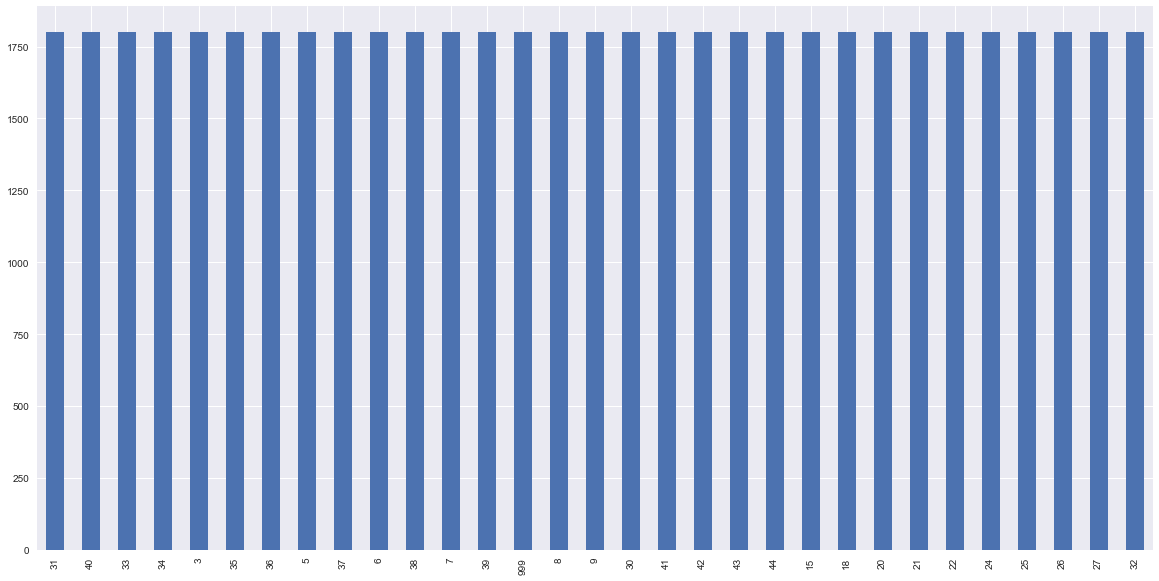

In [11]:
TripAnalysis['TripType'].value_counts().plot(kind='bar',figsize=(20,10) )

In [12]:
TripAnalysis.head()

,TripType,VisitNumber,Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,...,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems,Wknd_X_TotProdts
2,999,140278,Saturday,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999,19528,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
4,999,102008,Sunday,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,999,48082,Friday,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,999,165900,Wednesday,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Split , Test:Train = 70:30

In [13]:
from sklearn.cross_validation import train_test_split

/Users/sdutta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X = TripAnalysis.loc[:,'Saturday':]
y = TripAnalysis.loc[:,'TripType']

In [15]:
X.head()

,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,...,Slab1,Slab2,Slab3,CoreFood,NonCoreFood,Pharma,HomeCare,Clothing/Shoes,PersonalItems,Wknd_X_TotProdts
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
y.nunique()

31

In [17]:
y.head()

2    999
3    999
4    999
5    999
6    999
Name: TripType, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify =y)

In [19]:
len(y_train)/len(y_test)

2.3333333333333335

In [20]:
y_test.value_counts()

31     540
7      540
33     540
18     540
34     540
3      540
35     540
20     540
36     540
5      540
21     540
37     540
6      540
22     540
38     540
39     540
15     540
999    540
8      540
24     540
40     540
9      540
25     540
41     540
26     540
42     540
27     540
43     540
44     540
30     540
32     540
Name: TripType, dtype: int64

In [21]:
y_train.value_counts()

31     1260
40     1260
33     1260
34     1260
3      1260
35     1260
36     1260
5      1260
37     1260
6      1260
38     1260
7      1260
39     1260
999    1260
8      1260
9      1260
30     1260
41     1260
42     1260
43     1260
44     1260
15     1260
18     1260
20     1260
21     1260
22     1260
24     1260
25     1260
26     1260
27     1260
32     1260
Name: TripType, dtype: int64

In [22]:
1260/540   #Check ratio for class 8

2.3333333333333335

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

#### multi_class :  default: ‘ovr’

In [24]:
%%time
logreg = LogisticRegression()       #class_weight='balanced' already
logreg.fit(X_train, y_train)

y_log_pred_train = logreg.predict(X_train)
print('Logistic Regression Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_log_pred_train))

Logistic Regression Accuracy Score (Train)= 0.676625704045
CPU times: user 40.6 s, sys: 413 ms, total: 41.1 s
Wall time: 41.5 s


In [25]:
%%time
y_Log_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_Log_pred))

Logistic Regression Accuracy Score(Test)= 0.665890083632
CPU times: user 31.2 ms, sys: 14.4 ms, total: 45.6 ms
Wall time: 43.1 ms


#### For multi_class  use ‘multinomial’  ---->  solver = 'newton-cg'

Note: Need to add solver =  ‘newton-cg’, ‘sag’ or ‘lbfgs’  
As the default solver ‘liblinear’ doesn't support multinomial

In [26]:
%%time
logreg = LogisticRegression(multi_class= 'multinomial', solver = 'newton-cg')
logreg.fit(X_train, y_train)
y_log_pred_train = logreg.predict(X_train)
print('Logistic Regression Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_log_pred_train))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs
Logistic Regression Accuracy Score (Train)= 0.68305171531


In [29]:
%%time
y_Log_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_Log_pred))

Logistic Regression Accuracy Score(Test)= 0.670489844683
CPU times: user 32.2 ms, sys: 8.93 ms, total: 41.1 ms
Wall time: 25.4 ms


## Cross Validation

In [190]:
%%time

CV_Accuracy = cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

 
print("Cross Validated Accuracy:   %0.4f" %(CV_Accuracy))

KNN (k= 1 ) CV Scores 
Cross Validated Accuracy:   0.6702
CPU times: user 35min, sys: 2min 30s, total: 37min 31s
Wall time: 19min 45s


In [ ]:
%%time
CV_Precision = cross_val_score(logreg, X, y, cv=5, scoring='precision_micro').mean()
print("Cross Validated Precision:  %0.4f" %(CV_Precision))

In [ ]:
%%time
CV_Recall = cross_val_score(logreg, X, y, cv=5, scoring='recall_micro').mean()
print("Cross Validated Recall:     %0.4f" %(CV_Recall))

In [258]:
%%time
CV_F1 = cross_val_score(logreg, X, y, cv=5, scoring='f1_micro').mean()
print("Cross Validated F1:         %0.4f" %(CV_F1))

Cross Validated F1:         0.6702
CPU times: user 34min 12s, sys: 2min 23s, total: 36min 35s
Wall time: 18min 51s


In [30]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_log_pred_train, average='micro')
print('Recall micro-average for Logistic Regression (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test, y_Log_pred, average='micro')
print('Recall micro-average for Logistic Regression (Test) =', RecallTest)

Recall micro-average for Logistic Regression (Train) = 0.68305171531
Recall micro-average for Logistic Regression (Test) = 0.670489844683


In [31]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_log_pred_train, average='micro')
print('Precision micro-average for Logistic Regression (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_Log_pred, average='micro')
print('Precision micro-average for Logistic Regression (Test) =', PrecisionTest)

Precision micro-average for Logistic Regression (Train) = 0.68305171531
Precision micro-average for Logistic Regression (Test) = 0.670489844683


In [32]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_log_pred_train, average='micro')
print('F1_score micro-average for Logistic Regression (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_Log_pred, average='micro')
print('F1_score micro-average for Logistic Regression (Test) =', F1Test)

F1_score micro-average for Logistic Regression (Train) = 0.68305171531
F1_score micro-average for Logistic Regression (Test) = 0.670489844683


In [33]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: %.3f"% accuracy_score(y_test, y_Log_pred))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy: 0.670
             precision    recall  f1-score   support

          3       0.87      0.94      0.90       540
          5       0.78      0.88      0.82       540
          6       0.82      0.85      0.84       540
          7       0.66      0.66      0.66       540
          8       0.55      0.79      0.65       540
          9       0.47      0.56      0.51       540
         15       0.59      0.50      0.54       540
         18       0.70      0.70      0.70       540
         20       0.80      0.82      0.81       540
         21       0.71      0.76      0.73       540
         22       0.76      0.84      0.80       540
         24       0.61      0.60      0.60       540
         25       0.64      0.71      0.67       540
         26       0.73      0.74      0.73       540
         27       0.82      0.77      0.79       540
         30       0.61      0.68      0.65       540
         31       0.92      0.94      0.93       540
         32       0.75      0

#### Confusion Matrix - Logistic Regression - Multinomial

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn
seaborn.set_style("white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
def plot_confusion(title_plot,y_test, y_pred):
    
    #y_pred = clf.predict(x)
    c_mat = confusion_matrix(y_test,y_pred)
    labels = unique(y_test)
    seaborn.heatmap(
        sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=False);
    ylabel("True Label", fontsize = 'large',fontweight ='bold' )
    xlabel("Predicted Label", fontsize = 'large',fontweight ='bold' )
    title(title_plot, fontsize = 'xx-large',fontweight ='bold' )

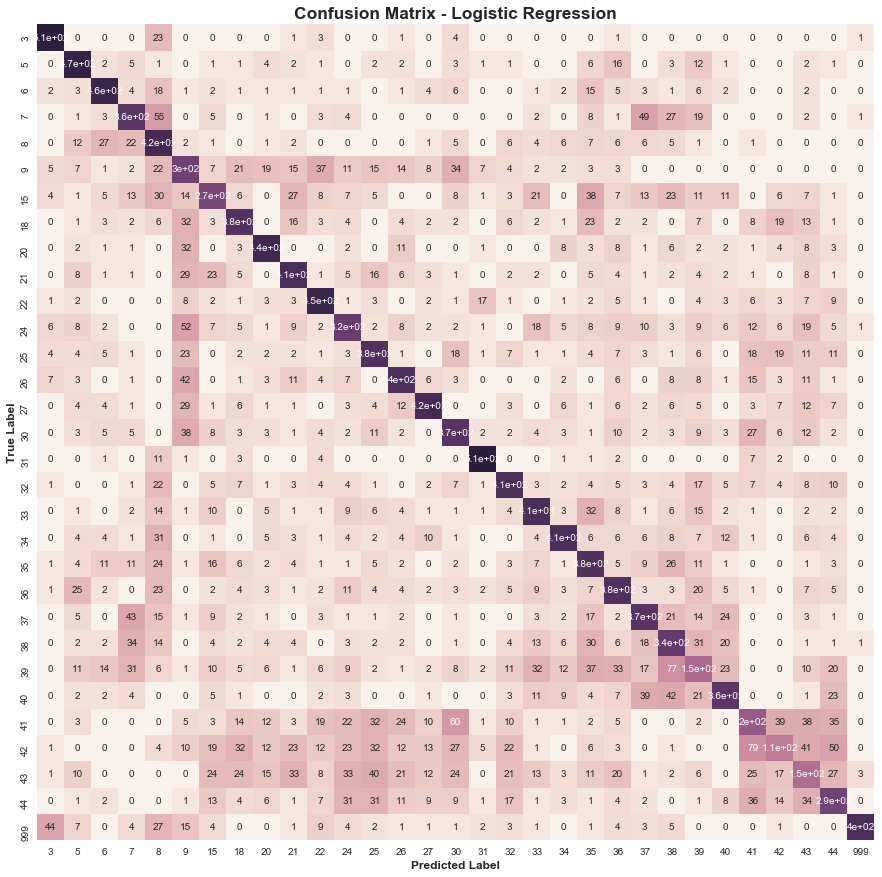

In [36]:
figsize(15, 15)
plot_confusion('Confusion Matrix - Logistic Regression',y_test, y_Log_pred)

#### KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
from sklearn.model_selection import cross_val_score

In [55]:
# search for an optimal value of K for KNN
k_range = list(range(1, 21))
k_scores = []

In [56]:
%%time
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_knn_pred = knn.predict(X_test)
    print('k=',k,'  Accuracy Score=',metrics.accuracy_score(y_test, y_knn_pred))
    k_scores.append(metrics.accuracy_score(y_test, y_knn_pred))  
    ## Here y_test is actual scores from the test set and y_pred are scores predicted by model for the test set data

k= 1   Accuracy Score= 0.709318996416
k= 2   Accuracy Score= 0.664516129032
k= 3   Accuracy Score= 0.666726403823
k= 4   Accuracy Score= 0.65376344086
k= 5   Accuracy Score= 0.650059737157
k= 6   Accuracy Score= 0.638948626045
k= 7   Accuracy Score= 0.636320191159
k= 8   Accuracy Score= 0.629032258065
k= 9   Accuracy Score= 0.627956989247
k= 10   Accuracy Score= 0.627001194743
k= 11   Accuracy Score= 0.626762246117
k= 12   Accuracy Score= 0.625567502987
k= 13   Accuracy Score= 0.622222222222
k= 14   Accuracy Score= 0.620071684588
k= 15   Accuracy Score= 0.620609318996
k= 16   Accuracy Score= 0.619115890084
k= 17   Accuracy Score= 0.618817204301
k= 18   Accuracy Score= 0.616845878136
k= 19   Accuracy Score= 0.618936678614
k= 20   Accuracy Score= 0.619474313023
CPU times: user 14min 20s, sys: 4.42 s, total: 14min 24s
Wall time: 14min 28s


In [57]:
max(k_scores)   # Best Accuracy at k=1

0.70931899641577056

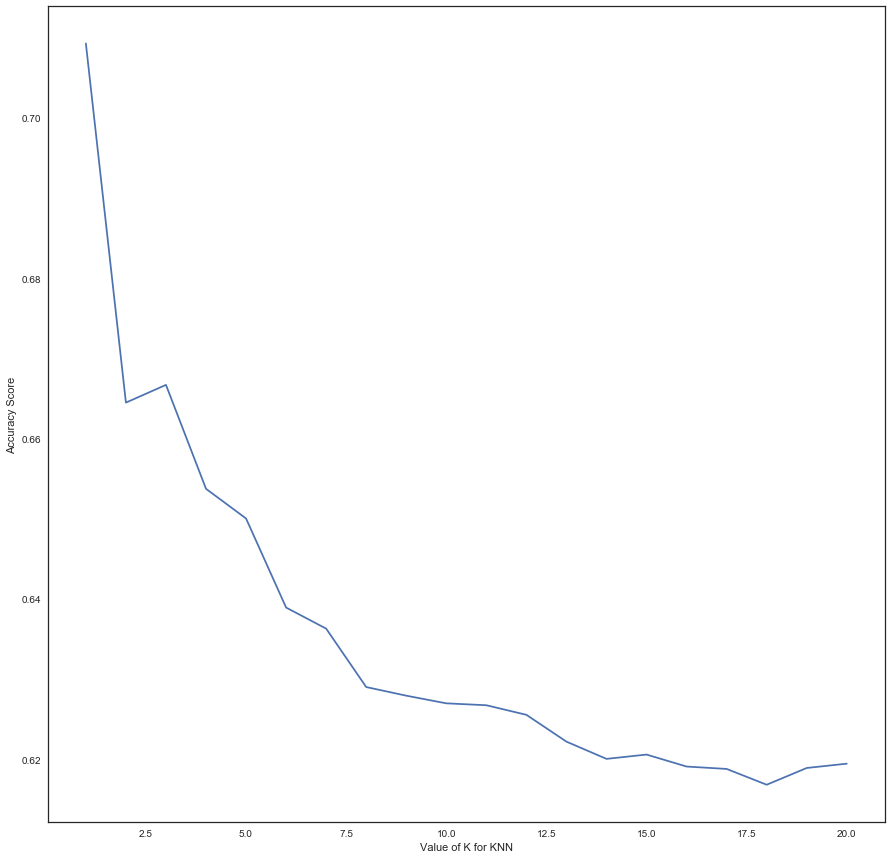

In [58]:
# plot the value of K for KNN (x-axis) versus the accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')

## Search for an optimal value of K for KNN - using Cross Validated Score

In [90]:
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    print('KNN (k=',k,') CV Accuracy Score =', scores.mean())
print("K_scores: ",k_scores)

KNN (k= 1 ) CV Accuracy Score = 0.661971326165
KNN (k= 2 ) CV Accuracy Score = 0.641953405018
KNN (k= 3 ) CV Accuracy Score = 0.64353046595
KNN (k= 4 ) CV Accuracy Score = 0.637867383513
KNN (k= 5 ) CV Accuracy Score = 0.631792114695
KNN (k= 6 ) CV Accuracy Score = 0.628136200717
KNN (k= 7 ) CV Accuracy Score = 0.623781362007
KNN (k= 8 ) CV Accuracy Score = 0.619283154122
KNN (k= 9 ) CV Accuracy Score = 0.615089605735
KNN (k= 10 ) CV Accuracy Score = 0.617419354839
KNN (k= 11 ) CV Accuracy Score = 0.614086021505
KNN (k= 12 ) CV Accuracy Score = 0.61476702509
KNN (k= 13 ) CV Accuracy Score = 0.613799283154
KNN (k= 14 ) CV Accuracy Score = 0.616039426523
KNN (k= 15 ) CV Accuracy Score = 0.614946236559
KNN (k= 16 ) CV Accuracy Score = 0.615896057348
KNN (k= 17 ) CV Accuracy Score = 0.615053763441
KNN (k= 18 ) CV Accuracy Score = 0.616523297491
KNN (k= 19 ) CV Accuracy Score = 0.614677419355
KNN (k= 20 ) CV Accuracy Score = 0.616111111111
K_scores:  [0.66197132616487464, 0.6419534050179210

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

In [92]:
max(k_scores)   # Best Accuracy at k=1

0.66197132616487464

In [ ]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### KNN for best CV accuracy score at k=  1   -------->>>>> BEST AT 66.19%



In [98]:
%%time
knn = KNeighborsClassifier(n_neighbors=1) #,class_weight='balanced')

scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print('KNN (k=',1,') CV Accuracy Scores =',scores.mean())   

KNN (k= 1 ) CV Accuracy Scores = 0.661971326165
CPU times: user 1min 44s, sys: 1.17 s, total: 1min 45s
Wall time: 1min 47s


In [65]:
%%time
y_knn_pred = knn.predict(X_test)
print('KNN (k=',k,') Accuracy Score(Test) =',metrics.accuracy_score(y_test, y_knn_pred))

KNN (k= 20 ) Accuracy Score(Test) = 0.666726403823
CPU times: user 35.6 s, sys: 131 ms, total: 35.7 s
Wall time: 35.8 s


#### Reducing CV = 5

In [101]:
%%time
classifier = knn
CV_Accuracy = cross_val_score(classifier, X, y, cv=5, scoring='accuracy').mean()
CV_Precision = cross_val_score(classifier, X, y, cv=5, scoring='precision_micro').mean()
CV_Recall = cross_val_score(classifier, X, y, cv=5, scoring='recall_micro').mean()
CV_F1 = cross_val_score(classifier, X, y, cv=5, scoring='f1_micro').mean()

print('KNN (k=',1,') CV Scores ')  
print("Cross Validated Accuracy:   %0.2f" %(CV_Accuracy))
print("Cross Validated Precision:  %0.2f" %(CV_Precision))
print("Cross Validated Recall:     %0.2f" %(CV_Recall))
print("Cross Validated F1:         %0.2f" %(CV_F1))

KNN (k= 1 ) CV Scores 
Cross Validated Accuracy:   0.65
Cross Validated Precision:  0.65
Cross Validated Recall:     0.65
Cross Validated F1:         0.65
CPU times: user 4min 45s, sys: 2.24 s, total: 4min 47s
Wall time: 4min 49s


In [104]:
%%time
knn.fit(X_train,y_train)
y_knn_pred = knn.predict(X_test)
print(classification_report(y_test, y_knn_pred))

             precision    recall  f1-score   support

          3       0.83      0.83      0.83       540
          5       0.80      0.78      0.79       540
          6       0.84      0.87      0.86       540
          7       0.58      0.55      0.57       540
          8       0.62      0.58      0.60       540
          9       0.50      0.43      0.46       540
         15       0.71      0.82      0.76       540
         18       0.82      0.90      0.86       540
         20       0.86      0.95      0.90       540
         21       0.84      0.94      0.88       540
         22       0.76      0.78      0.77       540
         24       0.57      0.47      0.52       540
         25       0.67      0.52      0.59       540
         26       0.84      0.93      0.88       540
         27       0.88      0.92      0.90       540
         30       0.74      0.78      0.76       540
         31       0.91      0.97      0.94       540
         32       0.69      0.65      0.67   

#### Confusion Matrix KNN, k=1

In [ ]:
RecallScores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

print('KNN (k=',1,') CV Accuracy Scores =',RecallScores.mean())

In [66]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_knn_pred_train, average='micro')
print('Recall micro-average for KNN (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_knn_pred, average='micro')
print('Recall micro-average for KNN (Test) =', RecallTest)

Recall micro-average for KNN (Train) = 0.804736303123
Recall micro-average for KNN (Test) = 0.666726403823


In [67]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_knn_pred_train, average='micro')
print('Precision micro-average for KNN (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_knn_pred, average='micro')
print('Precision micro-average for KNN (Test) =', PrecisionTest)

Precision micro-average for KNN (Train) = 0.804736303123
Precision micro-average for KNN (Test) = 0.666726403823


In [68]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_knn_pred_train, average='micro')
print('F1_score micro-average for KNN (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_knn_pred, average='micro')
print('F1_score micro-average for KNN (Test) =', F1Test)

F1_score micro-average for KNN (Train) = 0.804736303123
F1_score micro-average for KNN (Test) = 0.666726403823


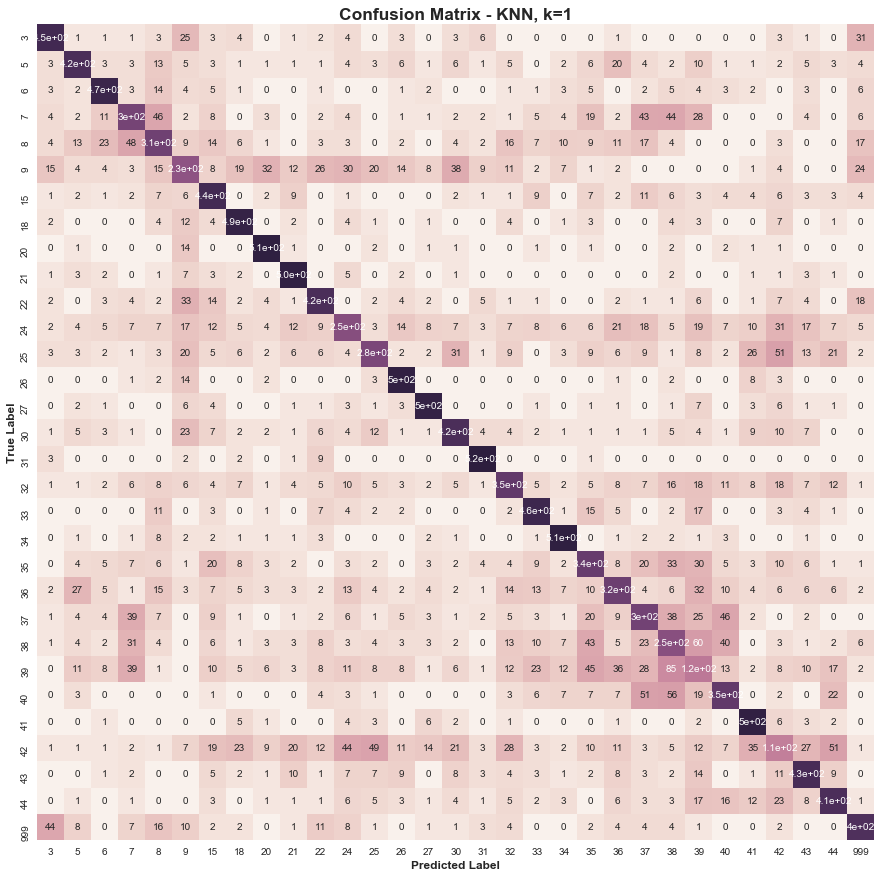

In [106]:
figsize(15, 15)
plot_confusion('Confusion Matrix - KNN, k=1',y_test, y_knn_pred)

#### Gaussian Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB 

In [52]:
%%time
GNB = GaussianNB()  #class_weight='balanced'
GNB.fit(X_train, y_train)

y_GNB_pred_train = GNB.predict(X_train)
print('Gaussian Naive Bayes Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_GNB_pred_train))

Gaussian Naive Bayes Accuracy Score (Train)= 0.38527905786
CPU times: user 929 ms, sys: 417 ms, total: 1.35 s
Wall time: 1.35 s


In [53]:
%%time
y_GNB_pred = GNB.predict(X_test)
print('Gaussian Naive Bayes Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_GNB_pred))

Gaussian Naive Bayes Accuracy Score (Test)= 0.377419354839
CPU times: user 363 ms, sys: 180 ms, total: 543 ms
Wall time: 542 ms


#### Support Vector Machine

In [71]:
from sklearn import svm

#### Linear Kernel 

In [72]:
%%time
model_svm = svm.SVC(kernel='linear')      #,class_weight='balanced')
model_svm.fit(X_train, y_train);

y_SVM_pred_train = model_svm.predict(X_train)
print('SVM Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_pred_train))

SVM Accuracy Score (Train)= 0.733307731695
CPU times: user 4min 4s, sys: 2.21 s, total: 4min 6s
Wall time: 4min 9s


In [73]:
%%time
y_SVM_pred = model_svm.predict(X_test)
print('SVM Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_pred))

SVM Accuracy Score (Test)= 0.703046594982
CPU times: user 45.3 s, sys: 261 ms, total: 45.5 s
Wall time: 45.7 s


In [74]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_SVM_pred_train, average='micro')
print('Recall micro-average for SVM Linear (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_SVM_pred, average='micro')
print('Recall micro-average for SVM Linear (Test) =', RecallTest)

Recall micro-average for SVM Linear (Train) = 0.733307731695
Recall micro-average for SVM Linear (Test) = 0.703046594982


In [75]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_SVM_pred_train, average='micro')
print('Precision micro-average for SVM Linear (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_SVM_pred, average='micro')
print('Precision micro-average for SVM Linear (Test) =', PrecisionTest)

Precision micro-average for SVM Linear (Train) = 0.733307731695
Precision micro-average for SVM Linear (Test) = 0.703046594982


In [76]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_SVM_pred_train, average='micro')
print('F1_score micro-average for SVM Linear (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_SVM_pred, average='micro')
print('F1_score micro-average for SVM Linear (Test) =', F1Test)

F1_score micro-average for SVM Linear (Train) = 0.733307731695
F1_score micro-average for SVM Linear (Test) = 0.703046594982


## Cross Validating SVM linear

In [161]:
%%time
model_svm_lin = svm.SVC(kernel='linear') #,class_weight='balanced')

CPU times: user 34 µs, sys: 11 µs, total: 45 µs
Wall time: 48.9 µs


In [169]:
%%time
 
CV_Accuracy = cross_val_score(model_svm_lin, X, y, cv=5, scoring='accuracy').mean()

print('SVM Linear CV Scores ')  
print("Cross Validated Accuracy:   %0.4f" %(CV_Accuracy))


SVM Linear CV Scores 
Cross Validated Accuracy:   0.7064
CPU times: user 13min 47s, sys: 6.38 s, total: 13min 53s
Wall time: 14min 6s


In [ ]:
CV_Precision = cross_val_score(model_svm_lin, X, y, cv=5, scoring='precision_micro').mean()
print("Cross Validated Precision:  %0.4f" %(CV_Precision))

In [ ]:
CV_Recall = cross_val_score(model_svm_lin, X, y, cv=5, scoring='recall_micro').mean()
print("Cross Validated Recall:     %0.4f" %(CV_Recall))

In [164]:
CV_F1 = cross_val_score(model_svm_lin, X, y, cv=5, scoring='f1_micro').mean()
print("Cross Validated F1:         %0.4f" %(CV_F1))

Cross Validated F1:         0.71


In [253]:
model_svm_lin = svm.SVC(kernel='linear', probability=True) 
CV_Log_Loss = cross_val_score(model_svm_lin, X_train, y_train, cv=5, scoring='log_loss').mean()
print("Cross Validated Log Loss score:   %0.4f" %(CV_Log_Loss))

Cross Validated Log Loss score:   -1.0567


In [259]:
print(classification_report(y_test, y_SVM_pred))

             precision    recall  f1-score   support

          3       0.86      0.96      0.91       540
          5       0.80      0.89      0.84       540
          6       0.84      0.86      0.85       540
          7       0.68      0.70      0.69       540
          8       0.71      0.70      0.71       540
          9       0.62      0.41      0.49       540
         15       0.58      0.55      0.56       540
         18       0.73      0.83      0.78       540
         20       0.80      0.86      0.83       540
         21       0.73      0.80      0.76       540
         22       0.75      0.89      0.81       540
         24       0.57      0.70      0.63       540
         25       0.62      0.73      0.67       540
         26       0.74      0.89      0.81       540
         27       0.80      0.89      0.84       540
         30       0.61      0.79      0.69       540
         31       0.90      0.96      0.93       540
         32       0.76      0.84      0.80   

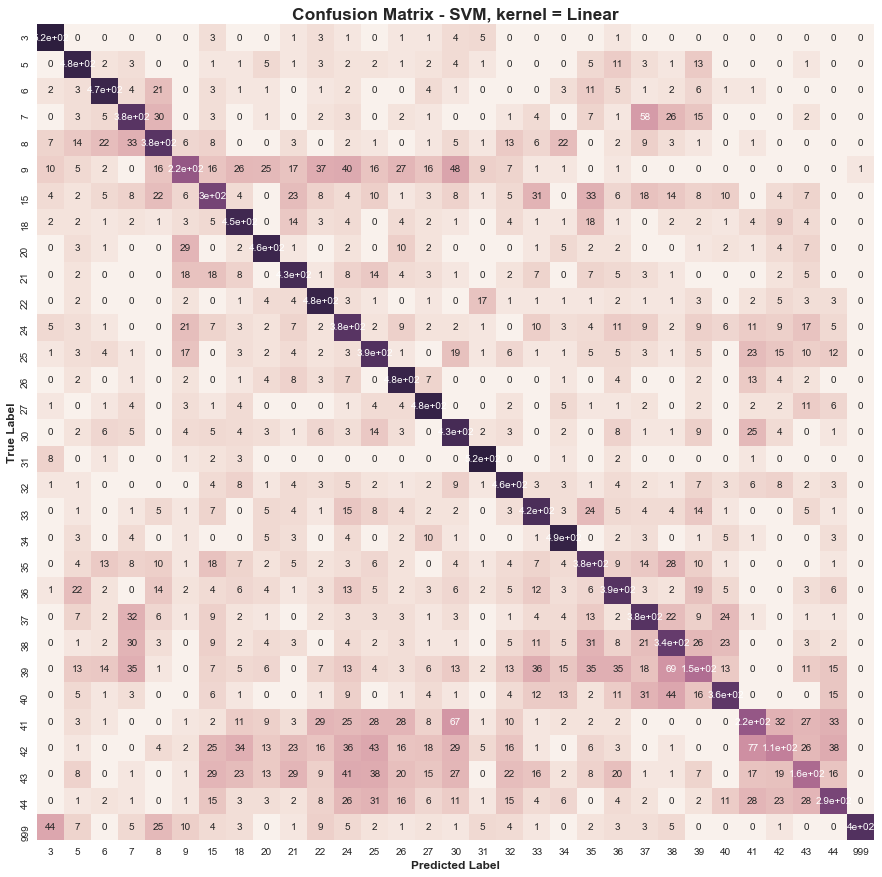

In [172]:
figsize(15, 15)
plot_confusion('Confusion Matrix - SVM, kernel = Linear',y_test, y_SVM_pred)

#### Polynomial Kernel    --- worst results within SVM

In [77]:
%%time
model_svm_pol = svm.SVC(kernel='poly')  #,class_weight='balanced' altrady
model_svm_pol.fit(X_train, y_train);

y_SVM_pol_pred_train = model_svm_pol.predict(X_train)
print('SVM (Polynomial) Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_pol_pred_train))

SVM (Polynomial) Accuracy Score (Train)= 0.671607782898
CPU times: user 5min 45s, sys: 2.01 s, total: 5min 47s
Wall time: 5min 49s


In [78]:
%%time
y_SVM_pol_pred = model_svm_pol.predict(X_test)
print('SVM (Polynomial) Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_pol_pred))

SVM (Polynomial) Accuracy Score (Test)= 0.590143369176
CPU times: user 1min 1s, sys: 283 ms, total: 1min 1s
Wall time: 1min 1s


#### RBF Kernel   ----3rd Best Result

#### decision_function_shape :  default=’ovr’

In [79]:
%%time
model_svm_rbf = svm.SVC(kernel='rbf')      #,class_weight='balanced' already
model_svm_rbf.fit(X_train, y_train);

y_SVM_rbf_pred_train = model_svm_rbf.predict(X_train)
print('SVM (RBF) Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_rbf_pred_train))

SVM (RBF) Accuracy Score (Train)= 0.751612903226
CPU times: user 5min 13s, sys: 2.13 s, total: 5min 15s
Wall time: 5min 17s


In [80]:
%%time
y_SVM_rbf_pred = model_svm_rbf.predict(X_test)
print('SVM (RBF) Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_rbf_pred))

SVM (RBF) Accuracy Score (Test)= 0.694982078853
CPU times: user 1min 8s, sys: 391 ms, total: 1min 8s
Wall time: 1min 8s


#### decision_function_shape : ‘ovo’  ----- Results of 'ovo' and 'ovr' are the same 

In [81]:
%%time
model_svm_rbf = svm.SVC(kernel='rbf',decision_function_shape = 'ovo')   #,class_weight='balanced'
model_svm_rbf.fit(X_train, y_train);

y_SVM_rbf_pred_train = model_svm_rbf.predict(X_train)
print('SVM (RBF) Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_SVM_rbf_pred_train))

SVM (RBF) Accuracy Score (Train)= 0.751612903226
CPU times: user 5min 9s, sys: 2.23 s, total: 5min 12s
Wall time: 5min 13s


In [82]:
%%time
y_SVM_rbf_pred = model_svm_rbf.predict(X_test)
print('SVM (RBF) Accuracy Score (Test)=',metrics.accuracy_score(y_test, y_SVM_rbf_pred))

SVM (RBF) Accuracy Score (Test)= 0.694982078853
CPU times: user 1min 9s, sys: 500 ms, total: 1min 9s
Wall time: 1min 10s


In [83]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_SVM_rbf_pred_train, average='micro')
print('Recall micro-average for SVM RBF (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_SVM_rbf_pred, average='micro')
print('Recall micro-average for SVM RBF (Test) =', RecallTest)

Recall micro-average for SVM RBF (Train) = 0.751612903226
Recall micro-average for SVM RBF (Test) = 0.694982078853


In [84]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train, y_SVM_rbf_pred_train, average='micro')
print('Precision micro-average for SVM RBF (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_SVM_rbf_pred, average='micro')
print('Precision micro-average for SVM RBF (Test) =', PrecisionTest)

Precision micro-average for SVM RBF (Train) = 0.751612903226
Precision micro-average for SVM RBF (Test) = 0.694982078853


In [85]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train, y_SVM_rbf_pred_train, average='micro')
print('F1_score micro-average for SVM RBF (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_SVM_rbf_pred, average='micro')
print('F1_score micro-average for SVM RBF (Test) =', F1Test)

F1_score micro-average for SVM RBF (Train) = 0.751612903226
F1_score micro-average for SVM RBF (Test) = 0.694982078853


In [86]:
print(classification_report(y_test, y_SVM_rbf_pred))

             precision    recall  f1-score   support

          3       0.88      0.91      0.89       540
          5       0.75      0.89      0.81       540
          6       0.82      0.83      0.82       540
          7       0.70      0.61      0.65       540
          8       0.61      0.74      0.67       540
          9       0.57      0.43      0.49       540
         15       0.67      0.51      0.58       540
         18       0.74      0.76      0.75       540
         20       0.78      0.90      0.84       540
         21       0.75      0.82      0.78       540
         22       0.80      0.70      0.75       540
         24       0.65      0.51      0.57       540
         25       0.62      0.67      0.65       540
         26       0.77      0.86      0.81       540
         27       0.85      0.85      0.85       540
         30       0.68      0.68      0.68       540
         31       0.92      0.91      0.92       540
         32       0.77      0.78      0.77   

#### Confusion Matrix - SVM, kernel ='rbf'

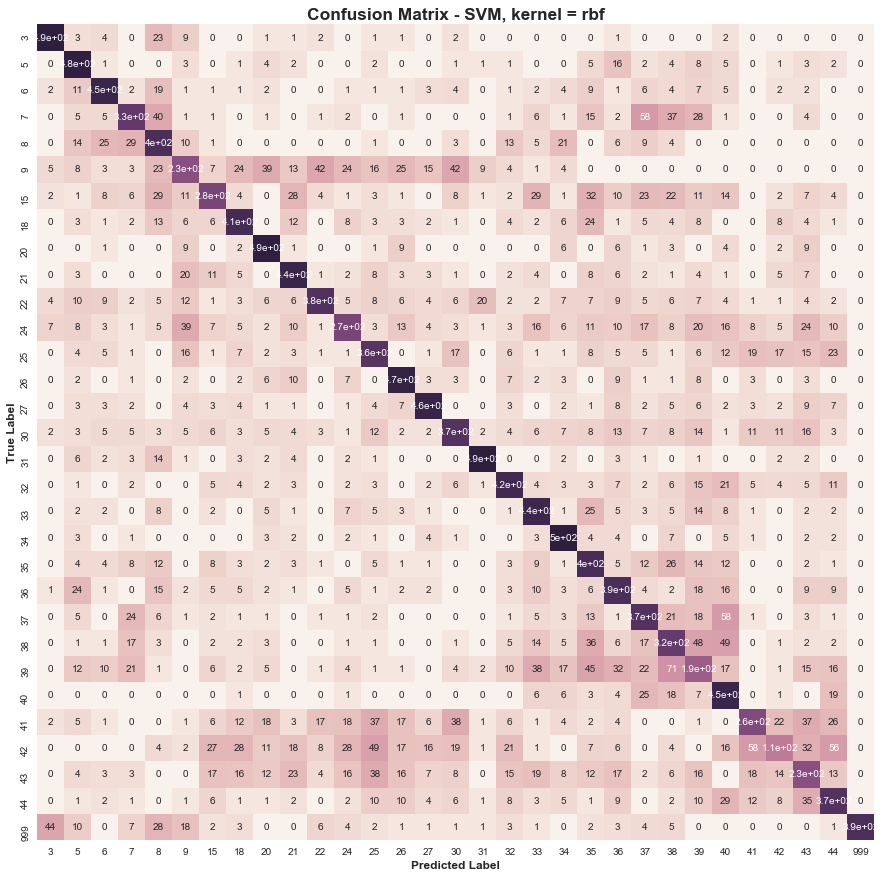

In [87]:
figsize(15, 15)
plot_confusion('Confusion Matrix - SVM, kernel = rbf',y_test, y_SVM_rbf_pred)

## CV SVM, Kernel = 'rbf'   , decision_function_shape : default=’ovr’

In [165]:
%%time
model_svm_rbf = svm.SVC(kernel='rbf')     #,class_weight='balanced')

CPU times: user 214 µs, sys: 2.9 ms, total: 3.11 ms
Wall time: 3.08 ms


In [168]:
%%time
model_svm_rbf 
CV_Accuracy = cross_val_score(model_svm_rbf , X, y, cv=5, scoring='accuracy').mean()

print('SVM Linear CV Scores ')  
print("Cross Validated Accuracy:   %0.4f" %(CV_Accuracy))

SVM Linear CV Scores 
Cross Validated Accuracy:   0.7001
CPU times: user 15min 24s, sys: 8.96 s, total: 15min 33s
Wall time: 15min 46s


In [ ]:
print("Cross Validated Accuracy:   %0.4f" %(CV_Accuracy))

In [ ]:
%%time
CV_Precision = cross_val_score(model_svm_rbf , X, y, cv=5, scoring='precision_micro').mean()
print("Cross Validated Precision:  %0.4f" %(CV_Precision))

In [ ]:
%%time
CV_Recall = cross_val_score(model_svm_rbf , X, y, cv=5, scoring='recall_micro').mean()
print("Cross Validated Recall:     %0.4f" %(CV_Recall))

In [167]:
%%time
CV_F1 = cross_val_score(model_svm_rbf , X, y, cv=5, scoring='f1_micro').mean()
print("Cross Validated F1:         %0.4f" %(CV_F1))

Cross Validated F1:         0.70
CPU times: user 14min 38s, sys: 6.33 s, total: 14min 45s
Wall time: 14min 53s


#### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
%%time
DTC = DecisionTreeClassifier(max_depth=15,class_weight='balanced')
DTC.fit(X_train, y_train);

y_DTC_pred_train = DTC.predict(X_train)
print('Decision Tree Classifier Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_DTC_pred_train))

Decision Tree Classifier Accuracy Score (Train)= 0.622196620584
CPU times: user 531 ms, sys: 70.9 ms, total: 602 ms
Wall time: 619 ms


In [39]:
%%time
y_DTC_pred = DTC.predict(X_test)
print('Decision Tree Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_DTC_pred))

Decision Tree Classifier Accuracy Score(Test)= 0.572700119474
CPU times: user 14.5 ms, sys: 7.36 ms, total: 21.8 ms
Wall time: 19.8 ms


In [40]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_DTC_pred_train, average='micro')
print('Recall micro-average for DTC (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,  y_DTC_pred, average='micro')
print('Recall micro-average for DTC (Test) =', RecallTest)

Recall micro-average for DTC (Train) = 0.622196620584
Recall micro-average for DTC (Test) = 0.572700119474


In [41]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train,  y_DTC_pred_train, average='micro')
print('Precision micro-average for DTC (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_DTC_pred, average='micro')
print('Precision micro-average for DTC (Test) =', PrecisionTest)

Precision micro-average for DTC (Train) = 0.622196620584
Precision micro-average for DTC (Test) = 0.572700119474


In [42]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train,y_DTC_pred_train, average='micro')
print('F1_score micro-average for DTC (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test, y_DTC_pred, average='micro')
print('F1_score micro-average for DTC (Test) =', F1Test)

F1_score micro-average for DTC (Train) = 0.622196620584
F1_score micro-average for DTC (Test) = 0.572700119474


#### Random Forest Classifier  -  BEST

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
%%time
RFC =  RandomForestClassifier(min_samples_split=5)      #class_weight='balanced',
RFC.fit(X_train, y_train);

y_RFC_pred_train = RFC.predict(X_train)
print('Random Forest Classifier Accuracy Score (Train)=',metrics.accuracy_score(y_train, y_RFC_pred_train))

Random Forest Classifier Accuracy Score (Train)= 0.932514080901
CPU times: user 1.16 s, sys: 140 ms, total: 1.3 s
Wall time: 1.32 s


In [145]:
%%time
y_RFC_pred = RFC.predict(X_test)
print('Random Forest Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_RFC_pred))

Random Forest Classifier Accuracy Score(Test)= 0.75890083632
CPU times: user 120 ms, sys: 44.8 ms, total: 165 ms
Wall time: 181 ms


In [146]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTrain = metrics.recall_score(y_train, y_RFC_pred_train, average='micro')
print('Recall micro-average for RFC (Train) =', RecallTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

RecallTest = metrics.recall_score(y_test,   y_RFC_pred, average='micro')
print('Recall micro-average for RFC (Test) =', RecallTest)

Recall micro-average for RFC (Train) = 0.932514080901
Recall micro-average for RFC (Test) = 0.75890083632


In [147]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTrain = metrics.precision_score(y_train,  y_RFC_pred_train, average='micro')
print('Precision micro-average for RFC (Train) =', PrecisionTrain)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

PrecisionTest = metrics.precision_score(y_test, y_RFC_pred, average='micro')
print('Precision micro-average for RFC (Test) =', PrecisionTest)

Precision micro-average for RFC (Train) = 0.932514080901
Precision micro-average for RFC (Test) = 0.75890083632


In [148]:
#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Train = metrics.f1_score(y_train,y_RFC_pred_train, average='micro')
print('F1_score micro-average for RFC (Train) =', F1Train)

#'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives

F1Test = metrics.f1_score(y_test,y_RFC_pred, average='micro')
print('F1_score micro-average for RFC (Test) =', F1Test)

F1_score micro-average for RFC (Train) = 0.932514080901
F1_score micro-average for RFC (Test) = 0.75890083632


In [149]:
%%time
y_RFC_pred = RFC.predict(X_test)
print('Random Forest Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_RFC_pred))
print(classification_report(y_test, y_RFC_pred))

Random Forest Classifier Accuracy Score(Test)= 0.75890083632
             precision    recall  f1-score   support

          3       0.87      0.96      0.91       540
          5       0.85      0.82      0.83       540
          6       0.87      0.90      0.88       540
          7       0.69      0.61      0.65       540
          8       0.68      0.70      0.69       540
          9       0.67      0.46      0.55       540
         15       0.78      0.77      0.77       540
         18       0.79      0.94      0.86       540
         20       0.84      0.94      0.89       540
         21       0.85      0.94      0.89       540
         22       0.84      0.89      0.87       540
         24       0.68      0.53      0.59       540
         25       0.72      0.68      0.70       540
         26       0.86      0.95      0.90       540
         27       0.86      0.96      0.91       540
         30       0.75      0.83      0.79       540
         31       0.90      0.98     

In [260]:
print(classification_report(y_test, y_SVM_pred))

             precision    recall  f1-score   support

          3       0.86      0.96      0.91       540
          5       0.80      0.89      0.84       540
          6       0.84      0.86      0.85       540
          7       0.68      0.70      0.69       540
          8       0.71      0.70      0.71       540
          9       0.62      0.41      0.49       540
         15       0.58      0.55      0.56       540
         18       0.73      0.83      0.78       540
         20       0.80      0.86      0.83       540
         21       0.73      0.80      0.76       540
         22       0.75      0.89      0.81       540
         24       0.57      0.70      0.63       540
         25       0.62      0.73      0.67       540
         26       0.74      0.89      0.81       540
         27       0.80      0.89      0.84       540
         30       0.61      0.79      0.69       540
         31       0.90      0.96      0.93       540
         32       0.76      0.84      0.80   

#### Confusion Matrix- Random Forest

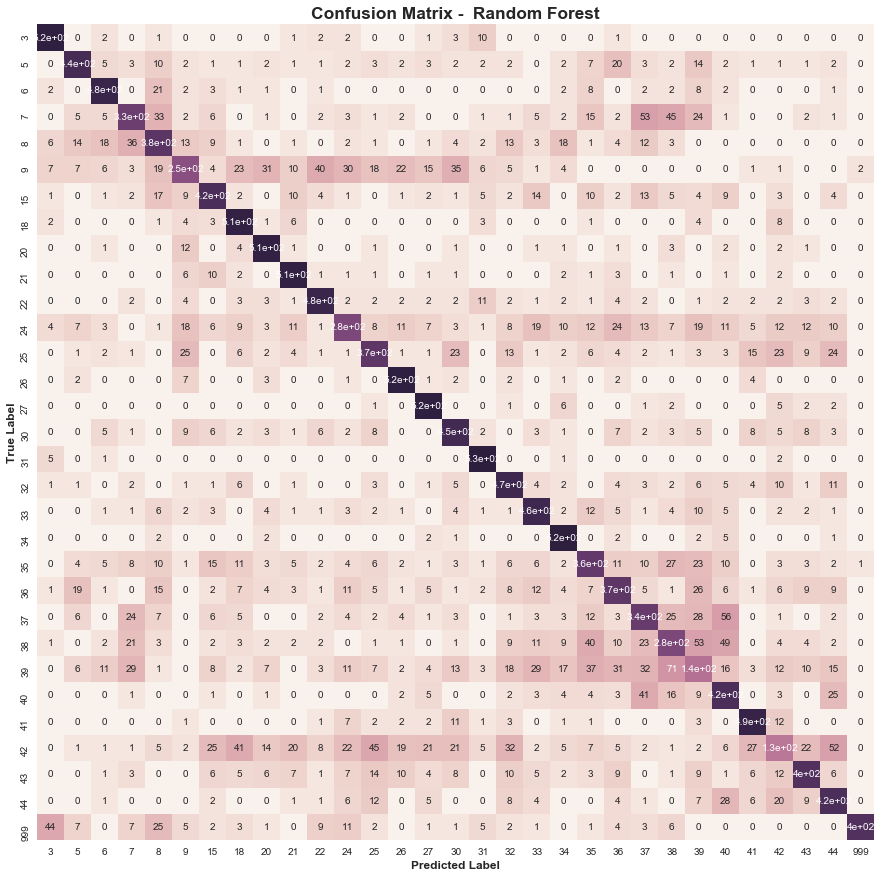

In [150]:
figsize(15, 15)
plot_confusion('Confusion Matrix -  Random Forest',y_test, y_RFC_pred)

## More efficient parameter tuning using GridSearchCV
GridSearch CV Searching multiple parameters simultaneously along with cross validating the score

In [130]:
RFC =  RandomForestClassifier()      #class_weight='balanced',

In [137]:
# define the parameter values that should be searched
Min_range = list(range(5, 61,5))  
print(Min_range)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]


In [138]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(min_samples_split=Min_range)
print(param_grid)

{'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]}


In [139]:
# instantiate the grid
grid = GridSearchCV(RFC, param_grid, cv=10, scoring='accuracy')

In [152]:
# fit grid with data(Train set used here for cross validation -- test set would be used as a hold out for predict scores)
grid.fit(X_train, y_train);

In [153]:
# view the complete results (list of named tuples)

grid.grid_scores_

[mean: 0.74432, std: 0.00486, params: {'min_samples_split': 5},
 mean: 0.73699, std: 0.00461, params: {'min_samples_split': 10},
 mean: 0.72990, std: 0.00550, params: {'min_samples_split': 15},
 mean: 0.72189, std: 0.00534, params: {'min_samples_split': 20},
 mean: 0.71603, std: 0.00455, params: {'min_samples_split': 25},
 mean: 0.71144, std: 0.00500, params: {'min_samples_split': 30},
 mean: 0.70499, std: 0.00352, params: {'min_samples_split': 35},
 mean: 0.70143, std: 0.00699, params: {'min_samples_split': 40},
 mean: 0.69685, std: 0.00552, params: {'min_samples_split': 45},
 mean: 0.69552, std: 0.00659, params: {'min_samples_split': 50},
 mean: 0.69480, std: 0.00528, params: {'min_samples_split': 55},
 mean: 0.68717, std: 0.00425, params: {'min_samples_split': 60}]

In [142]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
'''
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

'\n# examine the first tuple\nprint(grid.grid_scores_[0].parameters)\nprint(grid.grid_scores_[0].cv_validation_scores)\nprint(grid.grid_scores_[0].mean_validation_score)\n'

In [154]:
# examine the best model
print("Best Accuracy Score: ", grid.best_score_)
print("Best Param: ",grid.best_params_)
print("Best Estimator: ",grid.best_estimator_)

Best Accuracy Score:  0.744316436252
Best Param:  {'min_samples_split': 5}
Best Estimator:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


### CV scores for F1, Recall and Precision  for min_samples_split=5 and cross validation = 10 

In [206]:
%%time
classifier = grid.best_estimator_
CV_Accuracy = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy').mean()
CV_Precision = cross_val_score(classifier, X_train, y_train, cv=10, scoring='precision_micro').mean()
CV_Recall = cross_val_score(classifier, X_train, y_train, cv=10, scoring='recall_micro').mean()
CV_F1 = cross_val_score(classifier, X_train, y_train, cv=10, scoring='f1_micro').mean()

print('RFC (min_samples_split=5) CV Scores ')  
print("Cross Validated Accuracy:   %0.4f" %(CV_Accuracy))
print("Cross Validated Precision:  %0.4f" %(CV_Precision))
print("Cross Validated Recall:     %0.4f" %(CV_Recall))
print("Cross Validated F1:         %0.4f" %(CV_F1))


RFC (min_samples_split=5) CV Scores 
Cross Validated Accuracy:   0.7467
Cross Validated Precision:  0.7467
Cross Validated Recall:     0.7474
Cross Validated F1:         0.7455
CPU times: user 32.6 s, sys: 2.6 s, total: 35.2 s
Wall time: 35.3 s


In [197]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [203]:
CV_Accuracy = cross_val_score(grid.best_estimator_, X_train, y_train, cv=10, scoring='accuracy').mean()
print("Cross Validated Accuracy:   %0.4f" %(CV_Accuracy))

Cross Validated Accuracy:   0.7461


In [199]:
CV_F1 = cross_val_score(grid.best_estimator_, X_train, y_train, cv=10, scoring='f1_micro').mean()
print("Cross Validated F1:         %0.4f" %(CV_F1))

Cross Validated F1:         0.7474


In [257]:
CV_Log_Loss = cross_val_score(grid.best_estimator_, X_train, y_train, cv=10, scoring='log_loss').mean()
print("Cross Validated Log Loss score:   %0.4f" %(CV_Log_Loss))

Cross Validated Log Loss score:   -2.0270


##  Using Test set as Hold out set for predicting for Classification Report & consfusion metrix

In [158]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [159]:
y_RFC_pred = classifier.predict(X_test)
print('Random Forest Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_RFC_pred))
print(classification_report(y_test, y_RFC_pred))

Random Forest Classifier Accuracy Score(Test)= 0.755973715651
             precision    recall  f1-score   support

          3       0.87      0.96      0.91       540
          5       0.82      0.82      0.82       540
          6       0.88      0.90      0.89       540
          7       0.69      0.61      0.65       540
          8       0.64      0.69      0.67       540
          9       0.67      0.46      0.54       540
         15       0.78      0.79      0.78       540
         18       0.78      0.95      0.86       540
         20       0.84      0.97      0.90       540
         21       0.86      0.94      0.90       540
         22       0.85      0.91      0.88       540
         24       0.70      0.52      0.60       540
         25       0.70      0.64      0.67       540
         26       0.85      0.96      0.90       540
         27       0.86      0.97      0.91       540
         30       0.74      0.81      0.77       540
         31       0.90      0.99    

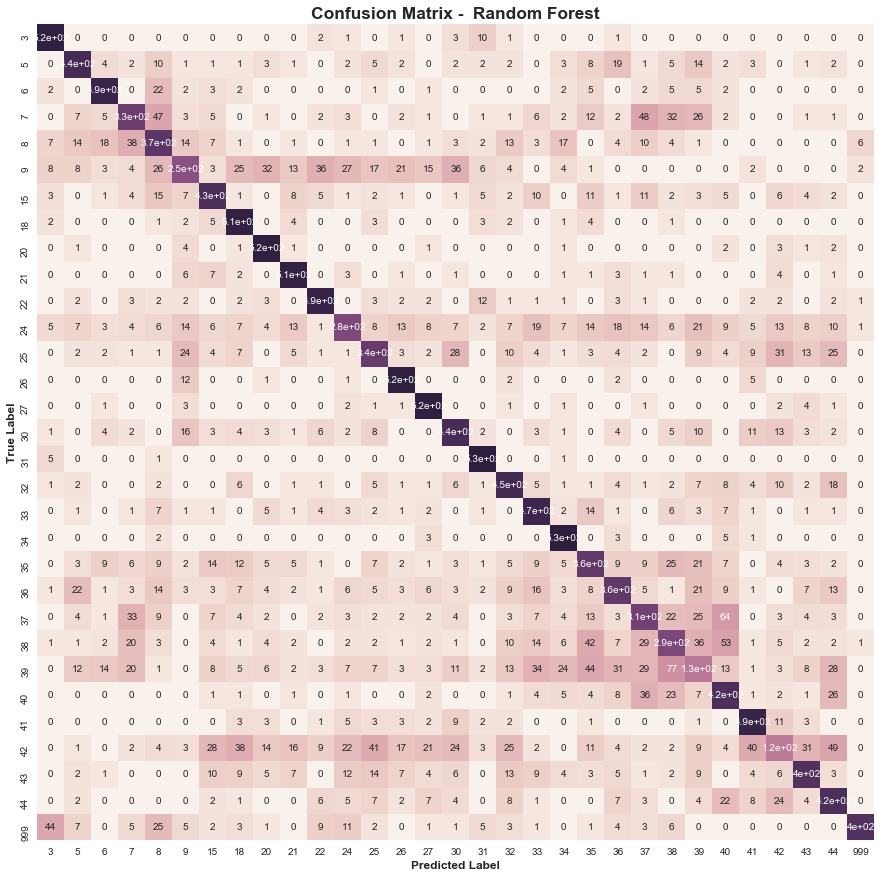

In [160]:
figsize(15, 15)
plot_confusion('Confusion Matrix -  Random Forest',y_test, y_RFC_pred)

#### Combination of KNN RFC and Logistic

In [173]:
len(y_RFC_pred), len(y_SVM_rbf_pred), len(y_Log_pred)

(16740, 16740, 16740)

In [176]:
y_ens = []
for i in range(len(y_RFC_pred)):
    if y_RFC_pred[i]==y_SVM_rbf_pred[i]:
        y_ens.append(y_RFC_pred[i])
    else:
        y_ens.append(y_SVM_pred[i])
print('Combined Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_ens))
print(classification_report(y_test, y_ens))

Combined Classifier Accuracy Score(Test)= 0.728733572282
             precision    recall  f1-score   support

          3       0.86      0.97      0.91       540
          5       0.79      0.88      0.83       540
          6       0.85      0.86      0.86       540
          7       0.69      0.65      0.67       540
          8       0.69      0.71      0.70       540
          9       0.68      0.43      0.53       540
         15       0.68      0.60      0.64       540
         18       0.74      0.85      0.79       540
         20       0.81      0.92      0.86       540
         21       0.76      0.84      0.80       540
         22       0.79      0.87      0.83       540
         24       0.63      0.61      0.62       540
         25       0.65      0.71      0.68       540
         26       0.78      0.91      0.84       540
         27       0.84      0.91      0.87       540
         30       0.66      0.79      0.72       540
         31       0.90      0.96      0.9

In [ ]:
 y_knn_pred  y_Log_pred

In [189]:
y_ens = []
for i in range(len(y_RFC_pred)):
    if y_knn_pred[i]==y_RFC_pred[i]:
        y_ens.append(y_RFC_pred[i])
    else:
        y_ens.append(y_Log_pred[i])
print('Combined Classifier Accuracy Score(Test)=',metrics.accuracy_score(y_test, y_ens))
print(classification_report(y_test, y_ens))

Combined Classifier Accuracy Score(Test)= 0.77688172043
             precision    recall  f1-score   support

          3       0.88      0.94      0.91       540
          5       0.82      0.86      0.84       540
          6       0.88      0.92      0.90       540
          7       0.69      0.65      0.67       540
          8       0.61      0.73      0.66       540
          9       0.64      0.48      0.55       540
         15       0.79      0.82      0.80       540
         18       0.82      0.94      0.87       540
         20       0.86      0.97      0.91       540
         21       0.84      0.93      0.89       540
         22       0.84      0.91      0.87       540
         24       0.73      0.63      0.67       540
         25       0.77      0.69      0.73       540
         26       0.88      0.96      0.92       540
         27       0.90      0.95      0.92       540
         30       0.76      0.86      0.81       540
         31       0.93      0.98      0.96

In [ ]:
logregM = LogisticRegression(C=1, penalty='l2', random_state=0, class_weight='balanced')

logregM.fit(X_train_scaled, y_train)

In [ ]:
%%time
knn.fit(X_train,y_train)
y_knn_pred = knn.predict(X_test)
print(classification_report(y_test, y_knn_pred))